In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
dataset1 = pd.read_csv('deep.csv')
X = dataset1[['Input']].values
Y= dataset1[['Output']].values
print(X)
print(Y)


[[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[[11]
 [21]
 [31]
 [41]
 [51]
 [61]
 [71]
 [81]
 [91]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


In [ ]:
class NeuralNet(nn.Module):
  def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 8)
        self.fc2 = nn.Linear(8, 10)
        self.fc3 = nn.Linear(10, 1)
        self.relu = nn.ReLU()
        self.history = {'loss': []}

  def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
lig = NeuralNet ()
criterion = nn. MSELoss ()
optimizer = optim.RMSprop (lig. parameters(), lr=0.001)

In [ ]:
def train_model(ai_brain, X_train, y_train, criterion, optimizer, epochs=4000) :
  for epoch in range (epochs) :
    optimizer. zero_grad()
    loss = criterion(ai_brain(X_train), y_train)
    loss. backward()
    optimizer.step()
    lig. history['loss'] .append(loss.item())
    if epoch % 200 == 0:
      print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}')

In [ ]:
train_model(lig, X_train_tensor, y_train_tensor, criterion, optimizer)

Epoch [0/4000], Loss: 2396.059082
Epoch [200/4000], Loss: 2031.950195
Epoch [400/4000], Loss: 1352.546509
Epoch [600/4000], Loss: 632.045105
Epoch [800/4000], Loss: 235.855957
Epoch [1000/4000], Loss: 156.223816
Epoch [1200/4000], Loss: 96.268181
Epoch [1400/4000], Loss: 42.681782
Epoch [1600/4000], Loss: 10.696607
Epoch [1800/4000], Loss: 0.851416
Epoch [2000/4000], Loss: 0.042218
Epoch [2200/4000], Loss: 0.002613
Epoch [2400/4000], Loss: 0.003539
Epoch [2600/4000], Loss: 0.003659
Epoch [2800/4000], Loss: 0.003645
Epoch [3000/4000], Loss: 0.003635
Epoch [3200/4000], Loss: 0.003636
Epoch [3400/4000], Loss: 0.003627
Epoch [3600/4000], Loss: 0.003620
Epoch [3800/4000], Loss: 0.003618


In [ ]:
with torch.no_grad():
    test_loss = criterion(lig(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')


Test Loss: 0.005839


Text(0, 0.5, 'Loss')

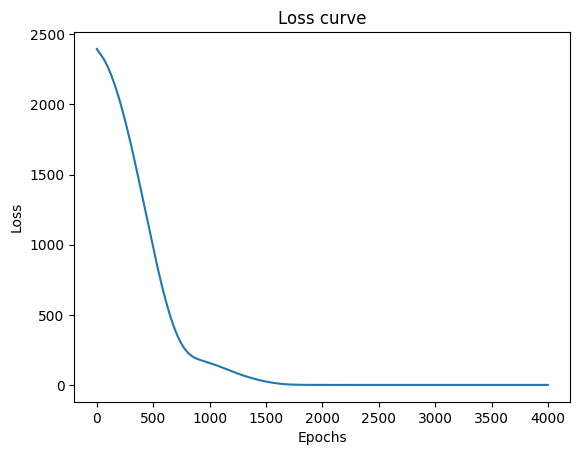

In [ ]:
import matplotlib.pyplot as plt
plt.plot(lig. history['loss'])
plt.title("Loss curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [ ]:
X_n1_1 = torch.tensor([[50]], dtype=torch.float32)
pred = lig(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {pred}')

Prediction: 499.8450622558594
